In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read train dataset
data = pd.read_csv("train.csv", sep = ";")
#Read test dataset
test = pd.read_csv("test.csv", sep = ";")

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,7.2,0.2,0.19,7.7,0.045,53,176,0.9958,3.17,0.38,9.5,5,white
6710,6.7,0.3,0.34,7.5,0.036,39,124,0.9912,2.99,0.32,12.4,8,white
6711,6.6,0.3,0.24,3.3,0.034,29,99,0.9903,3.10,0.40,12.3,7,white
6712,8.0,0.2,0.31,5.6,0.049,24,97,0.9930,3.10,0.42,10.9,5,white


In [4]:
data = data.drop_duplicates()

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,7.1,0.5,0.03,2.6,0.076,21,92,0.9975,3.50,0.60,9.8,5,red
6709,7.2,0.2,0.19,7.7,0.045,53,176,0.9958,3.17,0.38,9.5,5,white
6710,6.7,0.3,0.34,7.5,0.036,39,124,0.9912,2.99,0.32,12.4,8,white
6712,8.0,0.2,0.31,5.6,0.049,24,97,0.9930,3.10,0.42,10.9,5,white


In [6]:
#Change Type to bit
data.type = data.type.apply(lambda x : x.replace("white","1"))
data.type = data.type.apply(lambda x : x.replace("red","0"))
test.type = test.type.apply(lambda x : x.replace("white","1"))
test.type = test.type.apply(lambda x : x.replace("red","0"))
data = data.apply(pd.to_numeric)
test = test.apply(pd.to_numeric)

C:\Users\Luan Miro\AppData\Local\Temp\ipykernel_756\1979466984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.type = data.type.apply(lambda x : x.replace("white","1"))
C:\Users\Luan Miro\AppData\Local\Temp\ipykernel_756\1979466984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.type = data.type.apply(lambda x : x.replace("red","0"))


In [7]:
#Check missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5615 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5615 non-null   float64
 1   volatile acidity      5615 non-null   float64
 2   citric acid           5615 non-null   float64
 3   residual sugar        5615 non-null   float64
 4   chlorides             5615 non-null   float64
 5   free sulfur dioxide   5615 non-null   int64  
 6   total sulfur dioxide  5615 non-null   int64  
 7   density               5615 non-null   float64
 8   pH                    5615 non-null   float64
 9   sulphates             5615 non-null   float64
 10  alcohol               5615 non-null   float64
 11  quality               5615 non-null   int64  
 12  type                  5615 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 614.1 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.222300,0.324821,-0.119277,0.291713,-0.297059,-0.345554,0.497355,-0.251559,0.343154,-0.116453,-0.058580,-0.505957
volatile acidity,0.222300,1.000000,-0.382831,-0.184091,0.357989,-0.363261,-0.411236,0.323465,0.256932,0.235662,-0.105067,-0.262817,-0.651644
citric acid,0.324821,-0.382831,1.000000,0.144874,0.062208,0.140738,0.200662,0.082030,-0.346863,0.074837,0.019675,0.102957,0.191203
residual sugar,-0.119277,-0.184091,0.144874,1.000000,-0.141036,0.412815,0.497805,0.488445,-0.238063,-0.189982,-0.282323,-0.044146,0.347640
chlorides,0.291713,0.357989,0.062208,-0.141036,1.000000,-0.203079,-0.278344,0.370942,0.021520,0.453729,-0.275357,-0.195478,-0.504899
free sulfur dioxide,-0.297059,-0.363261,0.140738,0.412815,-0.203079,1.000000,0.731099,-0.021120,-0.149076,-0.210224,-0.134777,0.067008,0.487973
total sulfur dioxide,-0.345554,-0.411236,0.200662,0.497805,-0.278344,0.731099,1.000000,-0.021863,-0.228737,-0.279703,-0.209018,-0.034006,0.693959
density,0.497355,0.323465,0.082030,0.488445,0.370942,-0.021120,-0.021863,1.000000,0.048240,0.301368,-0.674777,-0.312899,-0.461873
pH,-0.251559,0.256932,-0.346863,-0.238063,0.021520,-0.149076,-0.228737,0.048240,1.000000,0.139882,0.075008,0.018921,-0.315511
sulphates,0.343154,0.235662,0.074837,-0.189982,0.453729,-0.210224,-0.279703,0.301368,0.139882,1.000000,-0.047602,0.024161,-0.495227


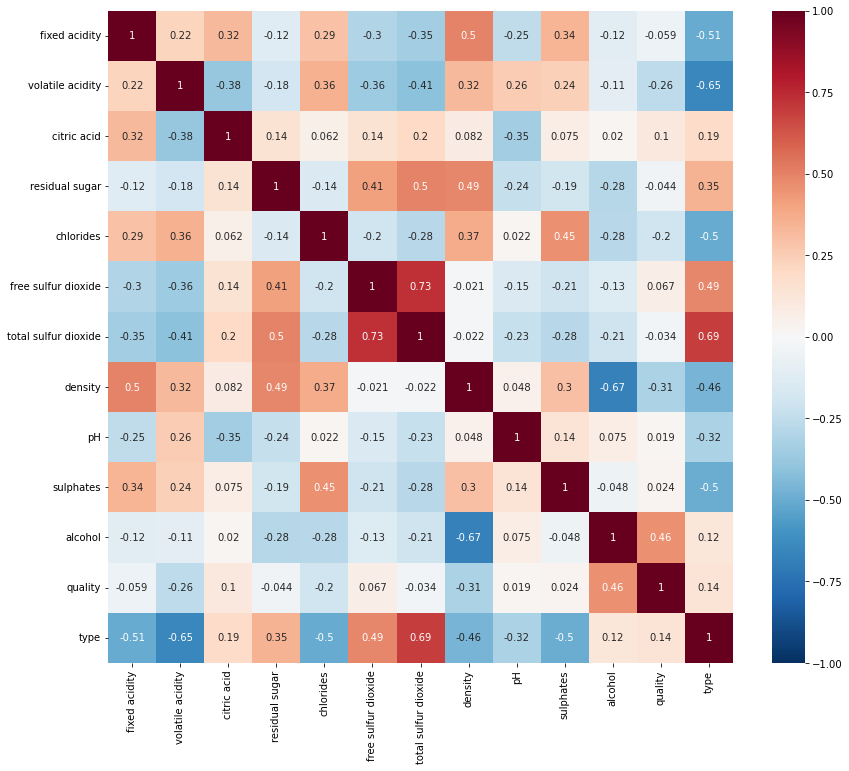

In [8]:
#correlation
correlation = data.corr()
display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

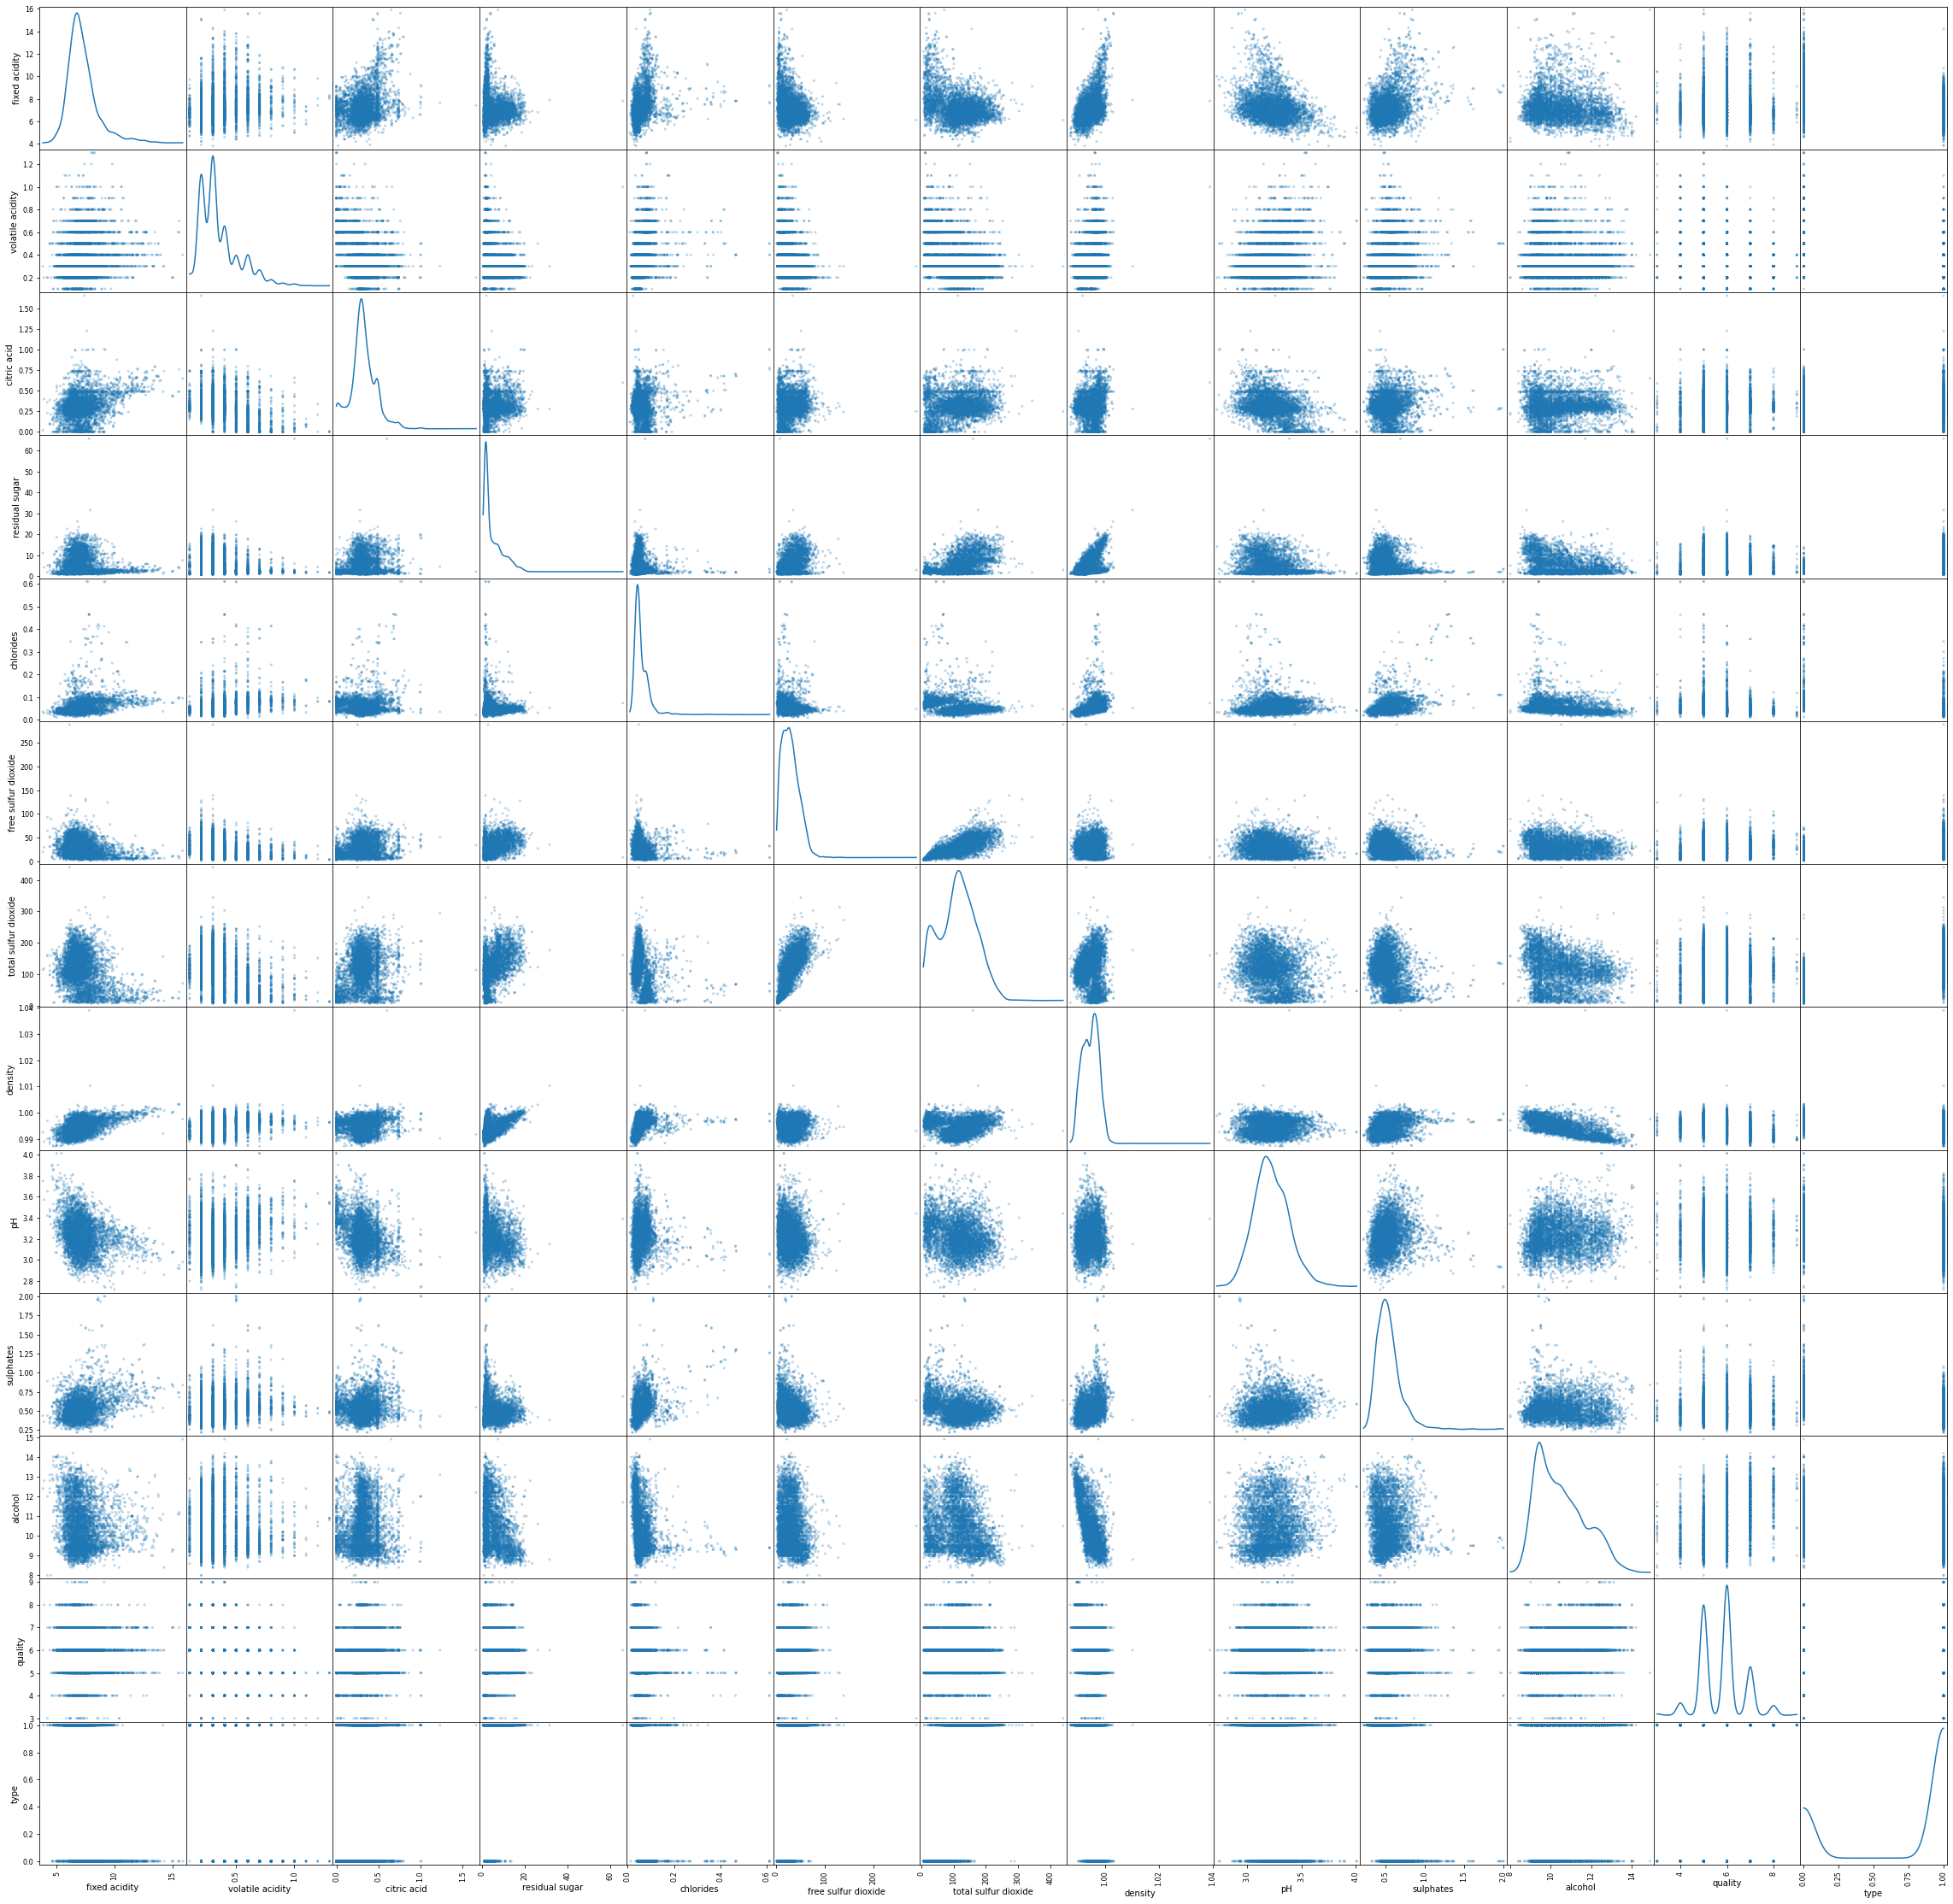

In [9]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (40,40), diagonal = 'kde');

In [10]:
#drop feature in train dataset and test dataset

data_new = data.drop('volatile acidity', axis = 1)
data_new = data_new.drop('residual sugar', axis = 1)
test_new = test.drop('volatile acidity', axis = 1)
test_new = test_new.drop('residual sugar', axis = 1)
# random_state: 43 \random_state: 46 \RMSE: 0.8001133494394526
#     n_estimators: 117 \n_estimators: 99 \RMSE: 0.7992105918860429
#         max_depth: 24 \max_depth: 4 \RMSE: 0.7965063963167297
#             max_depth: 8 \max_depth: 4 \RMSE: 0.7901661077040147

data_new = data.drop('volatile acidity', axis = 1)
data_new = data_new.drop('density', axis = 1)
test_new = test.drop('volatile acidity', axis = 1)
test_new = test_new.drop('density', axis = 1)


In [11]:
data_new

,fixed acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.36,0.035,43,126,0.9909,3.01,0.63,11.4,6,1
1,7.7,0.26,0.062,9,31,0.9966,3.39,0.64,9.6,5,0
2,8.4,0.35,0.076,21,127,0.9976,3.23,0.63,9.2,5,0
3,7.5,0.33,0.045,30,131,0.9942,3.32,0.44,10.9,6,1
4,6.4,0.25,0.083,35,157,0.9998,3.17,0.50,9.1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
6708,7.1,0.03,0.076,21,92,0.9975,3.50,0.60,9.8,5,0
6709,7.2,0.19,0.045,53,176,0.9958,3.17,0.38,9.5,5,1
6710,6.7,0.34,0.036,39,124,0.9912,2.99,0.32,12.4,8,1
6712,8.0,0.31,0.049,24,97,0.9930,3.10,0.42,10.9,5,1


In [12]:
test_new

,id,fixed acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1257,7.2,0.37,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,0
1,6409,8.2,0.39,0.039,49.0,208.0,0.99760,3.31,0.51,9.5,1
2,136,8.9,0.49,0.050,17.0,131.0,0.99560,3.13,0.34,9.4,1
3,1631,7.4,0.30,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,1
4,6084,6.4,0.56,0.156,49.0,106.0,0.99354,3.10,0.37,9.2,1
...,...,...,...,...,...,...,...,...,...,...,...
815,4646,6.1,0.56,0.046,46.0,184.0,0.99240,3.31,0.57,10.9,1
816,734,6.7,0.34,0.067,35.0,156.0,0.99542,3.11,0.48,9.3,1
817,5090,8.3,0.37,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,0
818,1579,6.3,0.29,0.037,32.0,140.0,0.98950,3.17,0.36,12.8,1


In [13]:
#remove outliers
# 1 - fixed acidity
# 2 - volatile acidity
# 3 - citric acid
# 4 - residual sugar
# 5 - chlorides
# 6 - free sulfur dioxide
# 7 - total sulfur dioxide
# 8 - density
# 9 - pH
# 10 - sulphates
# 11 - alcohol
liststr = {'fixed acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH'
           ,'sulphates','alcohol'}
for feature in liststr:
    upper_limit = data_new[feature].mean() + 2.5*data_new[feature].std()
    lower_limit = data_new[feature].mean() - 2.5*data_new[feature].std()
    
    # Remove the outliers, if any were specified
    data_new = data_new.loc[(data_new[feature] <= upper_limit) & (data_new[feature] >= lower_limit)]

In [14]:
#create more data(feature and element)
#train
# df_totalsd = data['total sulfur dioxide']
# df_freesd = data['free sulfur dioxide']
# df_ph = data['pH']

#test
# dt_totalsd = test['total sulfur dioxide']
# dt_freesd = test['free sulfur dioxide']
# dt_ph = test['pH']

# dfcom = (df_totalsd - df_freesd)*f_ph
# dtcom = (dt_totalsd - dt_freesd)*t_ph

# Molecular_df = df_freesd/(1+10**(df_ph-1.81))
# Molecular_dt= dt_freesd/(1+10**(dt_ph-1.81))

#add new data into dataset
# data_new['comsd'] = dfcom
# test_new['comsd'] = dtcom

# data_new['Molecular'] = Molecular_df
# test_new['Molecular'] = Molecular_dt

In [15]:
#check corr again
data_new.corr()

,fixed acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.188372,0.408508,-0.264149,-0.276078,0.424003,-0.181046,0.258217,-0.126692,-0.101096,-0.454488
citric acid,0.188372,1.000000,-0.238214,0.216966,0.300823,-0.038935,-0.322495,-0.029992,0.070950,0.130159,0.327999
chlorides,0.408508,-0.238214,1.000000,-0.304783,-0.389660,0.564035,0.268938,0.381898,-0.371396,-0.271594,-0.765917
free sulfur dioxide,-0.264149,0.216966,-0.304783,1.000000,0.727477,0.039811,-0.188457,-0.193014,-0.133830,0.103729,0.481267
total sulfur dioxide,-0.276078,0.300823,-0.389660,0.727477,1.000000,0.047704,-0.279136,-0.250828,-0.224143,-0.017785,0.678358
density,0.424003,-0.038935,0.564035,0.039811,0.047704,1.000000,0.120753,0.271422,-0.736432,-0.346223,-0.431438
pH,-0.181046,-0.322495,0.268938,-0.188457,-0.279136,0.120753,1.000000,0.277604,0.023556,0.007294,-0.397268
sulphates,0.258217,-0.029992,0.381898,-0.193014,-0.250828,0.271422,0.277604,1.000000,-0.049618,0.032284,-0.462936
alcohol,-0.126692,0.070950,-0.371396,-0.133830,-0.224143,-0.736432,0.023556,-0.049618,1.000000,0.465145,0.136803
quality,-0.101096,0.130159,-0.271594,0.103729,-0.017785,-0.346223,0.007294,0.032284,0.465145,1.000000,0.159616


In [16]:
#split data by type red and white wine
data_w = data_new[data_new.type == 1]
data_r = data_new[data_new.type == 0]
test_w = test_new[test_new.type == 1]
test_r = test_new[test_new.type == 0]

In [17]:
#selection train dataset
x_w = data_w.drop('quality',axis = 1)
y_w = data_w['quality']
x_r = data_r.drop('quality',axis = 1)
y_r = data_r['quality']

In [18]:
#selection test data
idt_w = test_w['id']
xt_w = test_w.drop('id',axis = 1)
idt_r = test_r['id']
xt_r = test_r.drop('id',axis = 1)

In [19]:
# Split data to train and test
from sklearn.model_selection import train_test_split
x_w_train,x_w_valid,y_w_train,y_w_valid= train_test_split(x_w,y_w,train_size = 0.85,test_size=0.15,random_state = 0)

In [20]:
from sklearn.model_selection import train_test_split
x_r_train,x_r_valid,y_r_train,y_r_valid= train_test_split(x_r,y_r,train_size =0.85,test_size=0.15,random_state = 0)

In [21]:
#normalization data
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_w_fit = norm.fit(x_w_train)
new_x_w_train = norm_w_fit.transform(x_w_train)
new_x_w_test = norm_w_fit.transform(x_w_valid)
new_xt_w = norm_w_fit.transform(xt_w)

In [22]:
#normalization test data
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_r_fit = norm.fit(x_r_train)
new_x_r_train = norm_r_fit.transform(x_r_train)
new_x_r_test = norm_r_fit.transform(x_r_valid)
new_xt_r = norm_r_fit.transform(xt_r)

In [23]:
### Training model

In [24]:
import math  
import sklearn.metrics  

In [25]:
data_result = pd.read_csv("check.csv")

In [32]:
#check test
#n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
#oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None
## w = random_state=5,n_estimators = 98,criterion='friedman_mse',max_depth = 19,max_features = 8
## r = random_state=37,n_estimators = 86,criterion='squared_error',max_depth = 25,max_features = 4
for i in range(70,131):
    from sklearn.ensemble import RandomForestRegressor
    rf_w_model = RandomForestRegressor(
                           random_state=43,n_estimators=i
                                        )
    rf_w_model.fit(new_x_w_train,y_w_train)
    y_w_rf_predict = rf_w_model.predict(new_xt_w)
    df_w = pd.DataFrame({'id':idt_w,'quality':y_w_rf_predict})
    for j in range(70,131):
        from sklearn.ensemble import RandomForestRegressor
        rf_r_model = RandomForestRegressor(
                        random_state=17,n_estimators=j
                                            )
        rf_r_model.fit(new_x_r_train,y_r_train)
        y_r_rf_predict = rf_r_model.predict(new_xt_r)
        df_r = pd.DataFrame({'id':idt_r,'quality':y_r_rf_predict})
        fn_df = pd.concat([df_w,df_r])
        fn_df = fn_df.sort_values('id')
        data_predict = fn_df['quality']

        mse = sklearn.metrics.mean_squared_error(data_result, data_predict)
        rmse = math.sqrt(mse) 
        print("n_estimators:",i,"\\n_estimators:",j,"\\RMSE:", rmse)
        

n_estimators: 70 \n_estimators: 70 \RMSE: 0.8073078059075999
n_estimators: 70 \n_estimators: 71 \RMSE: 0.8073808061852435
n_estimators: 70 \n_estimators: 72 \RMSE: 0.8074362248608375
n_estimators: 70 \n_estimators: 73 \RMSE: 0.8076423276312146
n_estimators: 70 \n_estimators: 74 \RMSE: 0.8074910838947033
n_estimators: 70 \n_estimators: 75 \RMSE: 0.8073111853777014
n_estimators: 70 \n_estimators: 76 \RMSE: 0.806929597549937
n_estimators: 70 \n_estimators: 77 \RMSE: 0.8070112650878034
n_estimators: 70 \n_estimators: 78 \RMSE: 0.807127506143558
n_estimators: 70 \n_estimators: 79 \RMSE: 0.8065241783929883
n_estimators: 70 \n_estimators: 80 \RMSE: 0.8065181646438274
n_estimators: 70 \n_estimators: 81 \RMSE: 0.8069585110440318
n_estimators: 70 \n_estimators: 82 \RMSE: 0.8070358862210134
n_estimators: 70 \n_estimators: 83 \RMSE: 0.8071847659736875
n_estimators: 70 \n_estimators: 84 \RMSE: 0.8069030860568992
n_estimators: 70 \n_estimators: 85 \RMSE: 0.8068748169911947
n_estimators: 70 \n_estima

n_estimators: 72 \n_estimators: 82 \RMSE: 0.8058241050030552
n_estimators: 72 \n_estimators: 83 \RMSE: 0.8059732085965609
n_estimators: 72 \n_estimators: 84 \RMSE: 0.8056911051039266
n_estimators: 72 \n_estimators: 85 \RMSE: 0.8056627935122813
n_estimators: 72 \n_estimators: 86 \RMSE: 0.805739659533669
n_estimators: 72 \n_estimators: 87 \RMSE: 0.8058326137097223
n_estimators: 72 \n_estimators: 88 \RMSE: 0.8057830922795531
n_estimators: 72 \n_estimators: 89 \RMSE: 0.8060588976567823
n_estimators: 72 \n_estimators: 90 \RMSE: 0.8062991615089558
n_estimators: 72 \n_estimators: 91 \RMSE: 0.8061872520946886
n_estimators: 72 \n_estimators: 92 \RMSE: 0.8065212287748306
n_estimators: 72 \n_estimators: 93 \RMSE: 0.8064799899816482
n_estimators: 72 \n_estimators: 94 \RMSE: 0.8068149424785014
n_estimators: 72 \n_estimators: 95 \RMSE: 0.8066168342593396
n_estimators: 72 \n_estimators: 96 \RMSE: 0.8067764969719435
n_estimators: 72 \n_estimators: 97 \RMSE: 0.8067613598483362
n_estimators: 72 \n_estim

n_estimators: 74 \n_estimators: 94 \RMSE: 0.8061098687275661
n_estimators: 74 \n_estimators: 95 \RMSE: 0.8059115871880397
n_estimators: 74 \n_estimators: 96 \RMSE: 0.8060713895925763
n_estimators: 74 \n_estimators: 97 \RMSE: 0.8060562392275883
n_estimators: 74 \n_estimators: 98 \RMSE: 0.806203648875032
n_estimators: 74 \n_estimators: 99 \RMSE: 0.8061742860880504
n_estimators: 74 \n_estimators: 100 \RMSE: 0.8060451714613162
n_estimators: 74 \n_estimators: 101 \RMSE: 0.805796803574056
n_estimators: 74 \n_estimators: 102 \RMSE: 0.8059127472409738
n_estimators: 74 \n_estimators: 103 \RMSE: 0.8056411066880457
n_estimators: 74 \n_estimators: 104 \RMSE: 0.8054966393966775
n_estimators: 74 \n_estimators: 105 \RMSE: 0.8056386106305541
n_estimators: 74 \n_estimators: 106 \RMSE: 0.8056514775833354
n_estimators: 74 \n_estimators: 107 \RMSE: 0.8056277278718471
n_estimators: 74 \n_estimators: 108 \RMSE: 0.8055458846305381
n_estimators: 74 \n_estimators: 109 \RMSE: 0.8054291979611068
n_estimators: 74

n_estimators: 76 \n_estimators: 106 \RMSE: 0.8063983634130988
n_estimators: 76 \n_estimators: 107 \RMSE: 0.8063746356992308
n_estimators: 76 \n_estimators: 108 \RMSE: 0.8062928682732525
n_estimators: 76 \n_estimators: 109 \RMSE: 0.8061762897229019
n_estimators: 76 \n_estimators: 110 \RMSE: 0.8061466581772886
n_estimators: 76 \n_estimators: 111 \RMSE: 0.8061420246403184
n_estimators: 76 \n_estimators: 112 \RMSE: 0.8062446986089853
n_estimators: 76 \n_estimators: 113 \RMSE: 0.8062058615951525
n_estimators: 76 \n_estimators: 114 \RMSE: 0.8062155032499916
n_estimators: 76 \n_estimators: 115 \RMSE: 0.8059672420443155
n_estimators: 76 \n_estimators: 116 \RMSE: 0.8057227523108873
n_estimators: 76 \n_estimators: 117 \RMSE: 0.8058727738561102
n_estimators: 76 \n_estimators: 118 \RMSE: 0.8056863859426918
n_estimators: 76 \n_estimators: 119 \RMSE: 0.8058965249194651
n_estimators: 76 \n_estimators: 120 \RMSE: 0.8057518246727019
n_estimators: 76 \n_estimators: 121 \RMSE: 0.8058727652485107
n_estima

n_estimators: 78 \n_estimators: 118 \RMSE: 0.8052118515121762
n_estimators: 78 \n_estimators: 119 \RMSE: 0.8054221142975532
n_estimators: 78 \n_estimators: 120 \RMSE: 0.8052773288039713
n_estimators: 78 \n_estimators: 121 \RMSE: 0.8053983406312383
n_estimators: 78 \n_estimators: 122 \RMSE: 0.8052902539571102
n_estimators: 78 \n_estimators: 123 \RMSE: 0.8050534822479523
n_estimators: 78 \n_estimators: 124 \RMSE: 0.8051355974388908
n_estimators: 78 \n_estimators: 125 \RMSE: 0.8050860454937739
n_estimators: 78 \n_estimators: 126 \RMSE: 0.8049894593856787
n_estimators: 78 \n_estimators: 127 \RMSE: 0.8050815629019403
n_estimators: 78 \n_estimators: 128 \RMSE: 0.8054116980220547
n_estimators: 78 \n_estimators: 129 \RMSE: 0.8052129785834345
n_estimators: 78 \n_estimators: 130 \RMSE: 0.8052228447064285
n_estimators: 79 \n_estimators: 70 \RMSE: 0.805993427141042
n_estimators: 79 \n_estimators: 71 \RMSE: 0.8060665464535501
n_estimators: 79 \n_estimators: 72 \RMSE: 0.8061220554808933
n_estimators

n_estimators: 80 \n_estimators: 130 \RMSE: 0.8059834509061904
n_estimators: 81 \n_estimators: 70 \RMSE: 0.8062386335790402
n_estimators: 81 \n_estimators: 71 \RMSE: 0.8063117306553271
n_estimators: 81 \n_estimators: 72 \RMSE: 0.8063672228045832
n_estimators: 81 \n_estimators: 73 \RMSE: 0.806573598735801
n_estimators: 81 \n_estimators: 74 \RMSE: 0.8064221545601891
n_estimators: 81 \n_estimators: 75 \RMSE: 0.8062420175307191
n_estimators: 81 \n_estimators: 76 \RMSE: 0.8058599234346862
n_estimators: 81 \n_estimators: 77 \RMSE: 0.805941699364583
n_estimators: 81 \n_estimators: 78 \RMSE: 0.806058094661653
n_estimators: 81 \n_estimators: 79 \RMSE: 0.8054539658655482
n_estimators: 81 \n_estimators: 80 \RMSE: 0.8054479441258157
n_estimators: 81 \n_estimators: 81 \RMSE: 0.8058888753063017
n_estimators: 81 \n_estimators: 82 \RMSE: 0.8059663531715151
n_estimators: 81 \n_estimators: 83 \RMSE: 0.8061154304540087
n_estimators: 81 \n_estimators: 84 \RMSE: 0.805833376749935
n_estimators: 81 \n_estimat

n_estimators: 83 \n_estimators: 81 \RMSE: 0.8057444374703807
n_estimators: 83 \n_estimators: 82 \RMSE: 0.8058219292229492
n_estimators: 83 \n_estimators: 83 \RMSE: 0.8059710332189711
n_estimators: 83 \n_estimators: 84 \RMSE: 0.8056889289646514
n_estimators: 83 \n_estimators: 85 \RMSE: 0.8056606172965347
n_estimators: 83 \n_estimators: 86 \RMSE: 0.8057374835255298
n_estimators: 83 \n_estimators: 87 \RMSE: 0.80583043795259
n_estimators: 83 \n_estimators: 88 \RMSE: 0.805780916388704
n_estimators: 83 \n_estimators: 89 \RMSE: 0.8060567225104494
n_estimators: 83 \n_estimators: 90 \RMSE: 0.8062969870107823
n_estimators: 83 \n_estimators: 91 \RMSE: 0.8061850772946653
n_estimators: 83 \n_estimators: 92 \RMSE: 0.8065190548753841
n_estimators: 83 \n_estimators: 93 \RMSE: 0.8064778159710406
n_estimators: 83 \n_estimators: 94 \RMSE: 0.8068127693704457
n_estimators: 83 \n_estimators: 95 \RMSE: 0.8066146606175586
n_estimators: 83 \n_estimators: 96 \RMSE: 0.806774323760332
n_estimators: 83 \n_estimato

n_estimators: 85 \n_estimators: 93 \RMSE: 0.8068160722862449
n_estimators: 85 \n_estimators: 94 \RMSE: 0.8071508853152496
n_estimators: 85 \n_estimators: 95 \RMSE: 0.8069528595705964
n_estimators: 85 \n_estimators: 96 \RMSE: 0.8071124558107899
n_estimators: 85 \n_estimators: 97 \RMSE: 0.8070973249880962
n_estimators: 85 \n_estimators: 98 \RMSE: 0.8072445445245409
n_estimators: 85 \n_estimators: 99 \RMSE: 0.8072152196005691
n_estimators: 85 \n_estimators: 100 \RMSE: 0.807086271498481
n_estimators: 85 \n_estimators: 101 \RMSE: 0.8068382240916596
n_estimators: 85 \n_estimators: 102 \RMSE: 0.8069540181266285
n_estimators: 85 \n_estimators: 103 \RMSE: 0.8066827282090253
n_estimators: 85 \n_estimators: 104 \RMSE: 0.8065384474930866
n_estimators: 85 \n_estimators: 105 \RMSE: 0.8066802353745547
n_estimators: 85 \n_estimators: 106 \RMSE: 0.8066930857131659
n_estimators: 85 \n_estimators: 107 \RMSE: 0.8066693666683844
n_estimators: 85 \n_estimators: 108 \RMSE: 0.8065876291206142
n_estimators: 85

n_estimators: 87 \n_estimators: 105 \RMSE: 0.8064706413247785
n_estimators: 87 \n_estimators: 106 \RMSE: 0.8064834950030171
n_estimators: 87 \n_estimators: 107 \RMSE: 0.8064597697938967
n_estimators: 87 \n_estimators: 108 \RMSE: 0.8063780110005891
n_estimators: 87 \n_estimators: 109 \RMSE: 0.8062614447611529
n_estimators: 87 \n_estimators: 110 \RMSE: 0.8062318163452543
n_estimators: 87 \n_estimators: 111 \RMSE: 0.8062271832977038
n_estimators: 87 \n_estimators: 112 \RMSE: 0.8063298464226976
n_estimators: 87 \n_estimators: 113 \RMSE: 0.8062910135102213
n_estimators: 87 \n_estimators: 114 \RMSE: 0.8063006541468231
n_estimators: 87 \n_estimators: 115 \RMSE: 0.806052419167313
n_estimators: 87 \n_estimators: 116 \RMSE: 0.8058079552774278
n_estimators: 87 \n_estimators: 117 \RMSE: 0.8059579609629147
n_estimators: 87 \n_estimators: 118 \RMSE: 0.8057715927546427
n_estimators: 87 \n_estimators: 119 \RMSE: 0.8059817095159341
n_estimators: 87 \n_estimators: 120 \RMSE: 0.8058370245653558
n_estimat

n_estimators: 89 \n_estimators: 117 \RMSE: 0.8052654720533473
n_estimators: 89 \n_estimators: 118 \RMSE: 0.8050789435404176
n_estimators: 89 \n_estimators: 119 \RMSE: 0.8052892410283579
n_estimators: 89 \n_estimators: 120 \RMSE: 0.8051444316407753
n_estimators: 89 \n_estimators: 121 \RMSE: 0.8052654634392562
n_estimators: 89 \n_estimators: 122 \RMSE: 0.805157358927306
n_estimators: 89 \n_estimators: 123 \RMSE: 0.8049205481263613
n_estimators: 89 \n_estimators: 124 \RMSE: 0.8050026768773925
n_estimators: 89 \n_estimators: 125 \RMSE: 0.8049531167498458
n_estimators: 89 \n_estimators: 126 \RMSE: 0.8048565146897522
n_estimators: 89 \n_estimators: 127 \RMSE: 0.8049486334177596
n_estimators: 89 \n_estimators: 128 \RMSE: 0.8052788230341447
n_estimators: 89 \n_estimators: 129 \RMSE: 0.8050800707977402
n_estimators: 89 \n_estimators: 130 \RMSE: 0.8050899385494771
n_estimators: 90 \n_estimators: 70 \RMSE: 0.8056384292994471
n_estimators: 90 \n_estimators: 71 \RMSE: 0.8057115808284445
n_estimator

n_estimators: 91 \n_estimators: 129 \RMSE: 0.8052103317382922
n_estimators: 91 \n_estimators: 130 \RMSE: 0.8052201978937171
n_estimators: 92 \n_estimators: 70 \RMSE: 0.8052247722061124
n_estimators: 92 \n_estimators: 71 \RMSE: 0.8052979613108285
n_estimators: 92 \n_estimators: 72 \RMSE: 0.8053535233129386
n_estimators: 92 \n_estimators: 73 \RMSE: 0.8055601589432094
n_estimators: 92 \n_estimators: 74 \RMSE: 0.8054085242064957
n_estimators: 92 \n_estimators: 75 \RMSE: 0.805228160418519
n_estimators: 92 \n_estimators: 76 \RMSE: 0.8048455850019592
n_estimators: 92 \n_estimators: 77 \RMSE: 0.8049274639827242
n_estimators: 92 \n_estimators: 78 \RMSE: 0.8050440059205225
n_estimators: 92 \n_estimators: 79 \RMSE: 0.804439115550411
n_estimators: 92 \n_estimators: 80 \RMSE: 0.8044330862138198
n_estimators: 92 \n_estimators: 81 \RMSE: 0.8048745733600011
n_estimators: 92 \n_estimators: 82 \RMSE: 0.804952148853321
n_estimators: 92 \n_estimators: 83 \RMSE: 0.8051014139318348
n_estimators: 92 \n_estim

n_estimators: 94 \n_estimators: 80 \RMSE: 0.804237192678203
n_estimators: 94 \n_estimators: 81 \RMSE: 0.8046787873014114
n_estimators: 94 \n_estimators: 82 \RMSE: 0.8047563816677725
n_estimators: 94 \n_estimators: 83 \RMSE: 0.8049056830501732
n_estimators: 94 \n_estimators: 84 \RMSE: 0.8046232052797241
n_estimators: 94 \n_estimators: 85 \RMSE: 0.8045948561114739
n_estimators: 94 \n_estimators: 86 \RMSE: 0.8046718241472504
n_estimators: 94 \n_estimators: 87 \RMSE: 0.804764901663382
n_estimators: 94 \n_estimators: 88 \RMSE: 0.8047153145272118
n_estimators: 94 \n_estimators: 89 \RMSE: 0.8049914857454687
n_estimators: 94 \n_estimators: 90 \RMSE: 0.8052320680903583
n_estimators: 94 \n_estimators: 91 \RMSE: 0.8051200103531245
n_estimators: 94 \n_estimators: 92 \RMSE: 0.8054544295585523
n_estimators: 94 \n_estimators: 93 \RMSE: 0.8054131361430787
n_estimators: 94 \n_estimators: 94 \RMSE: 0.8057485321349445
n_estimators: 94 \n_estimators: 95 \RMSE: 0.8055501616544988
n_estimators: 94 \n_estima

n_estimators: 96 \n_estimators: 92 \RMSE: 0.8054359900676856
n_estimators: 96 \n_estimators: 93 \RMSE: 0.8053946957068003
n_estimators: 96 \n_estimators: 94 \RMSE: 0.8057300993747458
n_estimators: 96 \n_estimators: 95 \RMSE: 0.8055317243550432
n_estimators: 96 \n_estimators: 96 \RMSE: 0.8056916021023
n_estimators: 96 \n_estimators: 97 \RMSE: 0.8056764445955875
n_estimators: 96 \n_estimators: 98 \RMSE: 0.805823923718997
n_estimators: 96 \n_estimators: 99 \RMSE: 0.8057945470950034
n_estimators: 96 \n_estimators: 100 \RMSE: 0.8056653716119158
n_estimators: 96 \n_estimators: 101 \RMSE: 0.8054168866050857
n_estimators: 96 \n_estimators: 102 \RMSE: 0.8055328849550201
n_estimators: 96 \n_estimators: 103 \RMSE: 0.8052611162622983
n_estimators: 96 \n_estimators: 104 \RMSE: 0.8051165807867857
n_estimators: 96 \n_estimators: 105 \RMSE: 0.8052586190269517
n_estimators: 96 \n_estimators: 106 \RMSE: 0.8052714920513923
n_estimators: 96 \n_estimators: 107 \RMSE: 0.8052477311327357
n_estimators: 96 \n_

n_estimators: 98 \n_estimators: 104 \RMSE: 0.8048916969160935
n_estimators: 98 \n_estimators: 105 \RMSE: 0.8050337748342346
n_estimators: 98 \n_estimators: 106 \RMSE: 0.8050466514540254
n_estimators: 98 \n_estimators: 107 \RMSE: 0.805022883899012
n_estimators: 98 \n_estimators: 108 \RMSE: 0.8049409791595429
n_estimators: 98 \n_estimators: 109 \RMSE: 0.8048242047884737
n_estimators: 98 \n_estimators: 110 \RMSE: 0.804794523460756
n_estimators: 98 \n_estimators: 111 \RMSE: 0.8047898821389385
n_estimators: 98 \n_estimators: 112 \RMSE: 0.8048927285900329
n_estimators: 98 \n_estimators: 113 \RMSE: 0.8048538263389181
n_estimators: 98 \n_estimators: 114 \RMSE: 0.8048634841901154
n_estimators: 98 \n_estimators: 115 \RMSE: 0.804614805823591
n_estimators: 98 \n_estimators: 116 \RMSE: 0.8043699050147554
n_estimators: 98 \n_estimators: 117 \RMSE: 0.8045201788299386
n_estimators: 98 \n_estimators: 118 \RMSE: 0.8043334774802123
n_estimators: 98 \n_estimators: 119 \RMSE: 0.8045439698234553
n_estimator

n_estimators: 100 \n_estimators: 115 \RMSE: 0.8042037380615885
n_estimators: 100 \n_estimators: 116 \RMSE: 0.8039587120338603
n_estimators: 100 \n_estimators: 117 \RMSE: 0.80410906269377
n_estimators: 100 \n_estimators: 118 \RMSE: 0.8039222658672341
n_estimators: 100 \n_estimators: 119 \RMSE: 0.8041328658505271
n_estimators: 100 \n_estimators: 120 \RMSE: 0.8039878481837274
n_estimators: 100 \n_estimators: 121 \RMSE: 0.8041090540672909
n_estimators: 100 \n_estimators: 122 \RMSE: 0.8040007940666153
n_estimators: 100 \n_estimators: 123 \RMSE: 0.8037636425100323
n_estimators: 100 \n_estimators: 124 \RMSE: 0.803845889461855
n_estimators: 100 \n_estimators: 125 \RMSE: 0.8037962580096053
n_estimators: 100 \n_estimators: 126 \RMSE: 0.8036995168988771
n_estimators: 100 \n_estimators: 127 \RMSE: 0.8037917682248755
n_estimators: 100 \n_estimators: 128 \RMSE: 0.8041224328746278
n_estimators: 100 \n_estimators: 129 \RMSE: 0.8039233947464444
n_estimators: 100 \n_estimators: 130 \RMSE: 0.803933276695

n_estimators: 102 \n_estimators: 125 \RMSE: 0.8036462884442765
n_estimators: 102 \n_estimators: 126 \RMSE: 0.8035495292783797
n_estimators: 102 \n_estimators: 127 \RMSE: 0.8036417978216969
n_estimators: 102 \n_estimators: 128 \RMSE: 0.8039725241525533
n_estimators: 102 \n_estimators: 129 \RMSE: 0.803773448902528
n_estimators: 102 \n_estimators: 130 \RMSE: 0.8037833326951805
n_estimators: 103 \n_estimators: 70 \RMSE: 0.8038795760867243
n_estimators: 103 \n_estimators: 71 \RMSE: 0.8039528876534761
n_estimators: 103 \n_estimators: 72 \RMSE: 0.8040085426085658
n_estimators: 103 \n_estimators: 73 \RMSE: 0.8042155238190786
n_estimators: 103 \n_estimators: 74 \RMSE: 0.8040636355037276
n_estimators: 103 \n_estimators: 75 \RMSE: 0.8038829699688743
n_estimators: 103 \n_estimators: 76 \RMSE: 0.8034997540585387
n_estimators: 103 \n_estimators: 77 \RMSE: 0.8035817701694368
n_estimators: 103 \n_estimators: 78 \RMSE: 0.803698507242329
n_estimators: 103 \n_estimators: 79 \RMSE: 0.8030926034415418
n_es

n_estimators: 105 \n_estimators: 74 \RMSE: 0.8041641492826842
n_estimators: 105 \n_estimators: 75 \RMSE: 0.8039835063345826
n_estimators: 105 \n_estimators: 76 \RMSE: 0.8036003383674025
n_estimators: 105 \n_estimators: 77 \RMSE: 0.803682344213631
n_estimators: 105 \n_estimators: 78 \RMSE: 0.803799066679988
n_estimators: 105 \n_estimators: 79 \RMSE: 0.8031932387380918
n_estimators: 105 \n_estimators: 80 \RMSE: 0.8031872000489977
n_estimators: 105 \n_estimators: 81 \RMSE: 0.8036293716437333
n_estimators: 105 \n_estimators: 82 \RMSE: 0.8037070673265458
n_estimators: 105 \n_estimators: 83 \RMSE: 0.8038565635995623
n_estimators: 105 \n_estimators: 84 \RMSE: 0.8035737170354991
n_estimators: 105 \n_estimators: 85 \RMSE: 0.8035453308411883
n_estimators: 105 \n_estimators: 86 \RMSE: 0.803622399396691
n_estimators: 105 \n_estimators: 87 \RMSE: 0.8037155984456842
n_estimators: 105 \n_estimators: 88 \RMSE: 0.8036659465662711
n_estimators: 105 \n_estimators: 89 \RMSE: 0.8039424782646634
n_estimator

n_estimators: 107 \n_estimators: 84 \RMSE: 0.8040642810489539
n_estimators: 107 \n_estimators: 85 \RMSE: 0.8040359121738266
n_estimators: 107 \n_estimators: 86 \RMSE: 0.8041129337105688
n_estimators: 107 \n_estimators: 87 \RMSE: 0.8042060759117823
n_estimators: 107 \n_estimators: 88 \RMSE: 0.8041564543164368
n_estimators: 107 \n_estimators: 89 \RMSE: 0.8044328173979799
n_estimators: 107 \n_estimators: 90 \RMSE: 0.8046735667742727
n_estimators: 107 \n_estimators: 91 \RMSE: 0.8045614312500753
n_estimators: 107 \n_estimators: 92 \RMSE: 0.8048960825346632
n_estimators: 107 \n_estimators: 93 \RMSE: 0.8048547604729588
n_estimators: 107 \n_estimators: 94 \RMSE: 0.8051903890520379
n_estimators: 107 \n_estimators: 95 \RMSE: 0.8049918810309478
n_estimators: 107 \n_estimators: 96 \RMSE: 0.8051518659740565
n_estimators: 107 \n_estimators: 97 \RMSE: 0.8051366983062698
n_estimators: 107 \n_estimators: 98 \RMSE: 0.8052842762783924
n_estimators: 107 \n_estimators: 99 \RMSE: 0.8052548799674399
n_estima

n_estimators: 109 \n_estimators: 94 \RMSE: 0.8056818155745429
n_estimators: 109 \n_estimators: 95 \RMSE: 0.8054834286634724
n_estimators: 109 \n_estimators: 96 \RMSE: 0.8056433159948793
n_estimators: 109 \n_estimators: 97 \RMSE: 0.8056281575796871
n_estimators: 109 \n_estimators: 98 \RMSE: 0.8057756455409496
n_estimators: 109 \n_estimators: 99 \RMSE: 0.8057462671567867
n_estimators: 109 \n_estimators: 100 \RMSE: 0.8056170839323237
n_estimators: 109 \n_estimators: 101 \RMSE: 0.8053685840270179
n_estimators: 109 \n_estimators: 102 \RMSE: 0.8054845893330373
n_estimators: 109 \n_estimators: 103 \RMSE: 0.8052128043399812
n_estimators: 109 \n_estimators: 104 \RMSE: 0.8050682601909351
n_estimators: 109 \n_estimators: 105 \RMSE: 0.8052103069548027
n_estimators: 109 \n_estimators: 106 \RMSE: 0.8052231807516036
n_estimators: 109 \n_estimators: 107 \RMSE: 0.8051994184073116
n_estimators: 109 \n_estimators: 108 \RMSE: 0.8051175316267273
n_estimators: 109 \n_estimators: 109 \RMSE: 0.805000782866569

n_estimators: 111 \n_estimators: 104 \RMSE: 0.8050936040888975
n_estimators: 111 \n_estimators: 105 \RMSE: 0.8052356463820011
n_estimators: 111 \n_estimators: 106 \RMSE: 0.8052485197736915
n_estimators: 111 \n_estimators: 107 \RMSE: 0.8052247581771591
n_estimators: 111 \n_estimators: 108 \RMSE: 0.8051428739737474
n_estimators: 111 \n_estimators: 109 \RMSE: 0.8050261288888587
n_estimators: 111 \n_estimators: 110 \RMSE: 0.8049964550063604
n_estimators: 111 \n_estimators: 111 \RMSE: 0.8049918148488149
n_estimators: 111 \n_estimators: 112 \RMSE: 0.8050946355041068
n_estimators: 111 \n_estimators: 113 \RMSE: 0.805055743009625
n_estimators: 111 \n_estimators: 114 \RMSE: 0.805065398438558
n_estimators: 111 \n_estimators: 115 \RMSE: 0.8048167824610252
n_estimators: 111 \n_estimators: 116 \RMSE: 0.8045719431311463
n_estimators: 111 \n_estimators: 117 \RMSE: 0.8047221792177338
n_estimators: 111 \n_estimators: 118 \RMSE: 0.8045355247444286
n_estimators: 111 \n_estimators: 119 \RMSE: 0.80474596423

n_estimators: 113 \n_estimators: 114 \RMSE: 0.8043066726954096
n_estimators: 113 \n_estimators: 115 \RMSE: 0.8040578221186855
n_estimators: 113 \n_estimators: 116 \RMSE: 0.8038127516114403
n_estimators: 113 \n_estimators: 117 \RMSE: 0.8039631295676842
n_estimators: 113 \n_estimators: 118 \RMSE: 0.8037762988264332
n_estimators: 113 \n_estimators: 119 \RMSE: 0.8039869370449955
n_estimators: 113 \n_estimators: 120 \RMSE: 0.8038418930518065
n_estimators: 113 \n_estimators: 121 \RMSE: 0.8039631209396392
n_estimators: 113 \n_estimators: 122 \RMSE: 0.8038548412852656
n_estimators: 113 \n_estimators: 123 \RMSE: 0.8036176466572934
n_estimators: 113 \n_estimators: 124 \RMSE: 0.8036999085496603
n_estimators: 113 \n_estimators: 125 \RMSE: 0.8036502680819907
n_estimators: 113 \n_estimators: 126 \RMSE: 0.8035535093952983
n_estimators: 113 \n_estimators: 127 \RMSE: 0.8036457774816486
n_estimators: 113 \n_estimators: 128 \RMSE: 0.8039765021754193
n_estimators: 113 \n_estimators: 129 \RMSE: 0.803777427

n_estimators: 115 \n_estimators: 124 \RMSE: 0.803309677084519
n_estimators: 115 \n_estimators: 125 \RMSE: 0.8032600125010316
n_estimators: 115 \n_estimators: 126 \RMSE: 0.8031632067994661
n_estimators: 115 \n_estimators: 127 \RMSE: 0.8032555197189655
n_estimators: 115 \n_estimators: 128 \RMSE: 0.8035864050275638
n_estimators: 115 \n_estimators: 129 \RMSE: 0.8033872340991989
n_estimators: 115 \n_estimators: 130 \RMSE: 0.8033971226432588
n_estimators: 116 \n_estimators: 70 \RMSE: 0.8040044685905569
n_estimators: 116 \n_estimators: 71 \RMSE: 0.8040777687702692
n_estimators: 116 \n_estimators: 72 \RMSE: 0.8041334150822002
n_estimators: 116 \n_estimators: 73 \RMSE: 0.8043403641592325
n_estimators: 116 \n_estimators: 74 \RMSE: 0.8041884994226686
n_estimators: 116 \n_estimators: 75 \RMSE: 0.8040078619455099
n_estimators: 116 \n_estimators: 76 \RMSE: 0.8036247055910762
n_estimators: 116 \n_estimators: 77 \RMSE: 0.8037067089510064
n_estimators: 116 \n_estimators: 78 \RMSE: 0.803823427879382
n_e

n_estimators: 118 \n_estimators: 73 \RMSE: 0.8044555871156325
n_estimators: 118 \n_estimators: 74 \RMSE: 0.8043037441349091
n_estimators: 118 \n_estimators: 75 \RMSE: 0.8041231325462166
n_estimators: 118 \n_estimators: 76 \RMSE: 0.8037400311432137
n_estimators: 118 \n_estimators: 77 \RMSE: 0.8038220227379987
n_estimators: 118 \n_estimators: 78 \RMSE: 0.8039387249246738
n_estimators: 118 \n_estimators: 79 \RMSE: 0.8033330023050688
n_estimators: 118 \n_estimators: 80 \RMSE: 0.8033269646665914
n_estimators: 118 \n_estimators: 81 \RMSE: 0.8037690593736436
n_estimators: 118 \n_estimators: 82 \RMSE: 0.8038467415549604
n_estimators: 118 \n_estimators: 83 \RMSE: 0.8039962118567398
n_estimators: 118 \n_estimators: 84 \RMSE: 0.8037134144383423
n_estimators: 118 \n_estimators: 85 \RMSE: 0.8036850331781505
n_estimators: 118 \n_estimators: 86 \RMSE: 0.8037620883383249
n_estimators: 118 \n_estimators: 87 \RMSE: 0.8038552711917704
n_estimators: 118 \n_estimators: 88 \RMSE: 0.8038056279400829
n_estima

n_estimators: 120 \n_estimators: 83 \RMSE: 0.8036073618677245
n_estimators: 120 \n_estimators: 84 \RMSE: 0.8033244275609669
n_estimators: 120 \n_estimators: 85 \RMSE: 0.803296032557476
n_estimators: 120 \n_estimators: 86 \RMSE: 0.8033731250284648
n_estimators: 120 \n_estimators: 87 \RMSE: 0.8034663529923398
n_estimators: 120 \n_estimators: 88 \RMSE: 0.8034166857093319
n_estimators: 120 \n_estimators: 89 \RMSE: 0.8036933031724449
n_estimators: 120 \n_estimators: 90 \RMSE: 0.8039342740066588
n_estimators: 120 \n_estimators: 91 \RMSE: 0.8038220353489655
n_estimators: 120 \n_estimators: 92 \RMSE: 0.804156994334459
n_estimators: 120 \n_estimators: 93 \RMSE: 0.8041156342923371
n_estimators: 120 \n_estimators: 94 \RMSE: 0.804451571245377
n_estimators: 120 \n_estimators: 95 \RMSE: 0.8042528808671607
n_estimators: 120 \n_estimators: 96 \RMSE: 0.8044130127856517
n_estimators: 120 \n_estimators: 97 \RMSE: 0.8043978311861023
n_estimators: 120 \n_estimators: 98 \RMSE: 0.8045455446888
n_estimators: 

n_estimators: 122 \n_estimators: 93 \RMSE: 0.8036423499748473
n_estimators: 122 \n_estimators: 94 \RMSE: 0.8039784846865512
n_estimators: 122 \n_estimators: 95 \RMSE: 0.8037796773636756
n_estimators: 122 \n_estimators: 96 \RMSE: 0.803939903536711
n_estimators: 122 \n_estimators: 97 \RMSE: 0.8039247130027987
n_estimators: 122 \n_estimators: 98 \RMSE: 0.8040725134204783
n_estimators: 122 \n_estimators: 99 \RMSE: 0.8040430728067289
n_estimators: 122 \n_estimators: 100 \RMSE: 0.8039136158910432
n_estimators: 122 \n_estimators: 101 \RMSE: 0.8036645892591479
n_estimators: 122 \n_estimators: 102 \RMSE: 0.8037808404934786
n_estimators: 122 \n_estimators: 103 \RMSE: 0.803508479211295
n_estimators: 122 \n_estimators: 104 \RMSE: 0.8033636284138399
n_estimators: 122 \n_estimators: 105 \RMSE: 0.803505976528886
n_estimators: 122 \n_estimators: 106 \RMSE: 0.8035188776320821
n_estimators: 122 \n_estimators: 107 \RMSE: 0.8034950648851952
n_estimators: 122 \n_estimators: 108 \RMSE: 0.803413004390709
n_e

n_estimators: 124 \n_estimators: 103 \RMSE: 0.8037281896076776
n_estimators: 124 \n_estimators: 104 \RMSE: 0.8035833784143603
n_estimators: 124 \n_estimators: 105 \RMSE: 0.8037256876094141
n_estimators: 124 \n_estimators: 106 \RMSE: 0.803738585185947
n_estimators: 124 \n_estimators: 107 \RMSE: 0.8037147789486334
n_estimators: 124 \n_estimators: 108 \RMSE: 0.8036327408895758
n_estimators: 124 \n_estimators: 109 \RMSE: 0.8035157763932004
n_estimators: 124 \n_estimators: 110 \RMSE: 0.8034860467312384
n_estimators: 124 \n_estimators: 111 \RMSE: 0.8034813978509864
n_estimators: 124 \n_estimators: 112 \RMSE: 0.8035844117679716
n_estimators: 124 \n_estimators: 113 \RMSE: 0.8035454461769824
n_estimators: 124 \n_estimators: 114 \RMSE: 0.8035551197534745
n_estimators: 124 \n_estimators: 115 \RMSE: 0.8033060363584377
n_estimators: 124 \n_estimators: 116 \RMSE: 0.803060736428332
n_estimators: 124 \n_estimators: 117 \RMSE: 0.8032112551775684
n_estimators: 124 \n_estimators: 118 \RMSE: 0.80302424950

n_estimators: 126 \n_estimators: 113 \RMSE: 0.8031142887329517
n_estimators: 126 \n_estimators: 114 \RMSE: 0.8031239675027074
n_estimators: 126 \n_estimators: 115 \RMSE: 0.8028747503472585
n_estimators: 126 \n_estimators: 116 \RMSE: 0.8026293186073408
n_estimators: 126 \n_estimators: 117 \RMSE: 0.8027799182460869
n_estimators: 126 \n_estimators: 118 \RMSE: 0.8025928120722541
n_estimators: 126 \n_estimators: 119 \RMSE: 0.8028037608120198
n_estimators: 126 \n_estimators: 120 \RMSE: 0.8026585030136048
n_estimators: 126 \n_estimators: 121 \RMSE: 0.8027799096053251
n_estimators: 126 \n_estimators: 122 \RMSE: 0.8026714703368301
n_estimators: 126 \n_estimators: 123 \RMSE: 0.8024339259116202
n_estimators: 126 \n_estimators: 124 \RMSE: 0.8025163091412294
n_estimators: 126 \n_estimators: 125 \RMSE: 0.8024665954562749
n_estimators: 126 \n_estimators: 126 \RMSE: 0.8023696940291482
n_estimators: 126 \n_estimators: 127 \RMSE: 0.8024620982320676
n_estimators: 126 \n_estimators: 128 \RMSE: 0.802793310

n_estimators: 128 \n_estimators: 123 \RMSE: 0.8027078204949081
n_estimators: 128 \n_estimators: 124 \RMSE: 0.8027901756171479
n_estimators: 128 \n_estimators: 125 \RMSE: 0.8027404788927331
n_estimators: 128 \n_estimators: 126 \RMSE: 0.8026436105309622
n_estimators: 128 \n_estimators: 127 \RMSE: 0.8027359832029223
n_estimators: 128 \n_estimators: 128 \RMSE: 0.8030670825746133
n_estimators: 128 \n_estimators: 129 \RMSE: 0.8028677828156626
n_estimators: 128 \n_estimators: 130 \RMSE: 0.8028776777574803
n_estimators: 129 \n_estimators: 70 \RMSE: 0.8031905091879025
n_estimators: 129 \n_estimators: 71 \RMSE: 0.8032638836437955
n_estimators: 129 \n_estimators: 72 \RMSE: 0.80331958633392
n_estimators: 129 \n_estimators: 73 \RMSE: 0.8035267450133475
n_estimators: 129 \n_estimators: 74 \RMSE: 0.8033747264755233
n_estimators: 129 \n_estimators: 75 \RMSE: 0.8031939059816929
n_estimators: 129 \n_estimators: 76 \RMSE: 0.8028103611515501
n_estimators: 129 \n_estimators: 77 \RMSE: 0.8028924476844929
n_